In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist

In [2]:
f_mnist = tf.keras.datasets.fashion_mnist

(train_img,train_lbl),(test_img,test_lbl) = f_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_img = train_img.reshape(train_img.shape[0], train_img.shape[1], train_img.shape[2], 1)
test_img = test_img.reshape(test_img.shape[0], test_img.shape[1], test_img.shape[2], 1)

train_img = train_img/255
test_img = test_img/255

In [4]:
# providing a reduced dataset, having 800 samples for each class so the dataset would has 8000 samples.

import numpy as np

p0=p1=p2=p3=p4=p5=p6=p7=p8=p9=i=j=0
red_train_img = np.zeros((8000, train_img.shape[1], train_img.shape[2], train_img.shape[3]))
red_train_lbl = np.zeros((8000, 1))

In [5]:
for i in range(len(train_lbl)):
  if j<8000:
    if train_lbl [i] == 0:
      if p0<800:
        red_train_img [j,:] = train_img [i,:]
        red_train_lbl [j] = train_lbl [i]
        j=j+1
        p0=p0+1

    if train_lbl [i] == 1:
      if p1<800:
        red_train_img [j,:] = train_img [i,:]
        red_train_lbl [j] = train_lbl [i]
        j=j+1
        p1=p1+1

    if train_lbl [i] == 2:
      if p2<800:
        red_train_img [j,:] = train_img [i,:]
        red_train_lbl [j] = train_lbl [i]
        j=j+1
        p2=p2+1

    if train_lbl [i] == 3:
      if p3<800:
        red_train_img [j,:] = train_img [i,:]
        red_train_lbl [j] = train_lbl [i]
        j=j+1
        p3=p3+1

    if train_lbl [i] == 4:
      if p4<800:
        red_train_img [j,:] = train_img [i,:]
        red_train_lbl [j] = train_lbl [i]
        j=j+1
        p4=p4+1

    if train_lbl [i] == 5:
      if p5<800:
        red_train_img [j,:] = train_img [i,:]
        red_train_lbl [j] = train_lbl [i]
        j=j+1
        p5=p5+1

    if train_lbl [i] == 6:
      if p6<800:
        red_train_img [j,:] = train_img [i,:]
        red_train_lbl [j] = train_lbl [i]
        j=j+1
        p6=p6+1

    if train_lbl [i] == 7:
      if p7<800:
        red_train_img [j,:] = train_img [i,:]
        red_train_lbl [j] = train_lbl [i]
        j=j+1
        p7=p7+1

    if train_lbl [i] == 8:
      if p8<800:
        red_train_img [j,:] = train_img [i,:]
        red_train_lbl [j] = train_lbl [i]
        j=j+1
        p8=p8+1

    if train_lbl [i] == 7:
      if p9<800:
        red_train_img [j,:] = train_img [i,:]
        red_train_lbl [j] = train_lbl [i]
        j=j+1
        p9=p9+1

In [6]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential([Conv2D(64, (3,3), activation='relu', input_shape=(red_train_img.shape[1], red_train_img.shape[2], 1)),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')])

In [7]:
from keras import optimizers

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [8]:
import timeit

tic = timeit.default_timer()
trained_model = model.fit(red_train_img, red_train_lbl, batch_size=32, epochs=30, verbose=1, validation_split=0.05)
toc = timeit.default_timer()

Epoch 1/30
238/238 [==============================] - 34s 5ms/step - loss: 1.0578 - accuracy: 0.6209 - val_loss: 0.6781 - val_accuracy: 0.7450
Epoch 2/30
238/238 [==============================] - 1s 3ms/step - loss: 0.4444 - accuracy: 0.8336 - val_loss: 0.4637 - val_accuracy: 0.8175
Epoch 3/30
238/238 [==============================] - 1s 3ms/step - loss: 0.3849 - accuracy: 0.8632 - val_loss: 0.4318 - val_accuracy: 0.8400
Epoch 4/30
238/238 [==============================] - 1s 3ms/step - loss: 0.3148 - accuracy: 0.8875 - val_loss: 0.3653 - val_accuracy: 0.8550
Epoch 5/30
238/238 [==============================] - 1s 3ms/step - loss: 0.3002 - accuracy: 0.8930 - val_loss: 0.3874 - val_accuracy: 0.8600
Epoch 6/30
238/238 [==============================] - 1s 3ms/step - loss: 0.2569 - accuracy: 0.9100 - val_loss: 0.4201 - val_accuracy: 0.8425
Epoch 7/30
238/238 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.9096 - val_loss: 0.3810 - val_accuracy: 0.8575
Epoch

In [9]:
print('The Running Time is:', toc-tic)

The Running Time is: 55.386658474


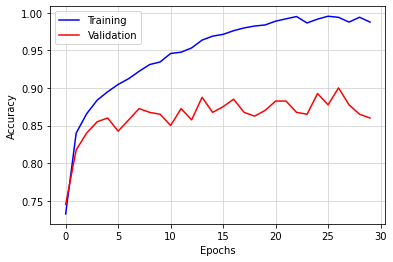

In [15]:
import matplotlib.pyplot as plt

history = trained_model.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(acc_tra, 'blue')
plt.plot(acc_val, 'red')

plt.legend(['Training', 'Validation'])
plt.grid(c='lightgrey')
plt.show()

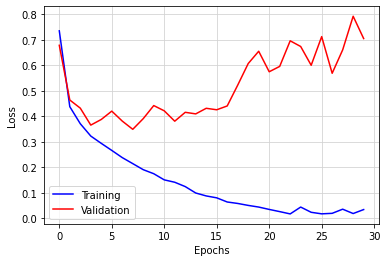

In [16]:
loss_val = history['val_loss']
loss_tra = history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(loss_tra, 'blue')
plt.plot(loss_val, 'red')

plt.legend(['Training', 'Validation'])
plt.grid(c='lightgrey')
plt.show()